<a href="https://colab.research.google.com/github/samyff12/Sales.Analysis/blob/main/EF_tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1: Econometría Financiera

## Samuel Francisco ID 1062508


### Paquetes

In [147]:
install.packages('fredr')
install.packages('dplyr')
install.packages('tibble')
install.packages('ggplot2')
install.packages('zoo')
install.packages('cowplot')
install.packages('astsa')
install.packages('gridExtra')
install.packages('grid')
install.packages('tidyr')
install.packages('stargazer')
install.packages('Hmisc')
install.packages('reshape2')
install.packages('data.table')
install.packages('forecast')
# install.packages('grid')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’




In [ ]:
# Librerías
library(fredr)
library(purrr)
library(dplyr)
library(ggplot2)
library(zoo)
library(cowplot)
library(astsa)
library(gridExtra)
library(grid)
library(tidyr)
library(stargazer)
library(Hmisc)
library(readxl)
library(reshape2)
library(data.table)
library(forecast)

In [ ]:
# options(repr.plot.width = 15, repr.plot.height = 12)

#ignorar warnings
oldw <- getOption("warn")
options(warn = -1)

# volver a ver warnings
## options(warn = oldw)

In [4]:
options(repr.plot.width = 20, repr.plot.height = 10)

In [ ]:

# Importando datos del FRED

# data_oil <- fredr(
#   series_id = "DCOILWTICO",
#   observation_start = as.Date("2017-01-01"),
#   observation_end = as.Date("2022-05-01"),
#   frequency = "d",
#   realtime_start = NULL
# )

# data_sp500 <- fredr(
#   series_id = "SP500",
#   observation_start = as.Date("2017-01-01"),
#   observation_end = as.Date("2022-05-01"),
#   frequency = "d"
# )

# data_vix <- fredr(
#   series_id = "VIXCLS",
#   observation_start = as.Date("2017-01-01"),
#   observation_end = as.Date("2022-05-01"),
#   frequency = "d"
# )

### <h2> Ejercicio 1

Un gerente bancario ha decidido invertir el excedente trimestral de sus operaciones en una divisa segura durante los próximos dos meses. En tal sentido, le ha solicitado, de entre los siguientes países, realizar una comparación del riesgo, usando los datos diarios de los siguientes países: México, Perú, Colombia, Rep. Dom., Costa Rica, Brasil, en el periodo 2015-2019.

In [17]:
df <- read_excel('/content/tasas.xlsx', sheet = 1)
df1 <- melt(df, id.vars='date')

In [ ]:
#### 1.1.Obtenga una representación temporal del nivel y tasa de variación de los países.
df1 %>% ggplot(aes(x = date, y = value, color = variable)) +
          geom_line() +
          labs(title="Series de tipo de cambio", subtitle="Unidad en Moneda Nacional(UMN) por dólar 2015-2019 ", x = "Período", y = "UMN", color = "País") +
          theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5)) +
          facet_grid(variable ~ ., scales="free_y") 

df1 <- df1 %>%  group_by(variable) %>% dplyr::mutate(rt=(value-lag(value, 1)))
df1 %>% drop_na(rt) %>% ggplot(aes(x = date, y = rt, color = variable)) +
          geom_line() +
          labs(title="Series de variaciones de tipo de cambio", subtitle="Unidad en Moneda Nacional(UMN) por dólar 2015-2019 ", x = "Período", y = "variaciones", color = "País") +
          theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5)) +
          facet_grid(variable ~ ., scales="free_y") 

#### 1.2 Identifique la persistencia en media y volatilidad de las series.

# Las series presentan un orden de integración 1 por lo que hace falta diferenciarla 1 vez para que exista persistencia en media. Respecto a la volatilidad, la serie del peso dominicano presenta la menor volatilidad para el periodo estudiado.
# Mientras que costa rica posee los mayores clusteres de volatilidad

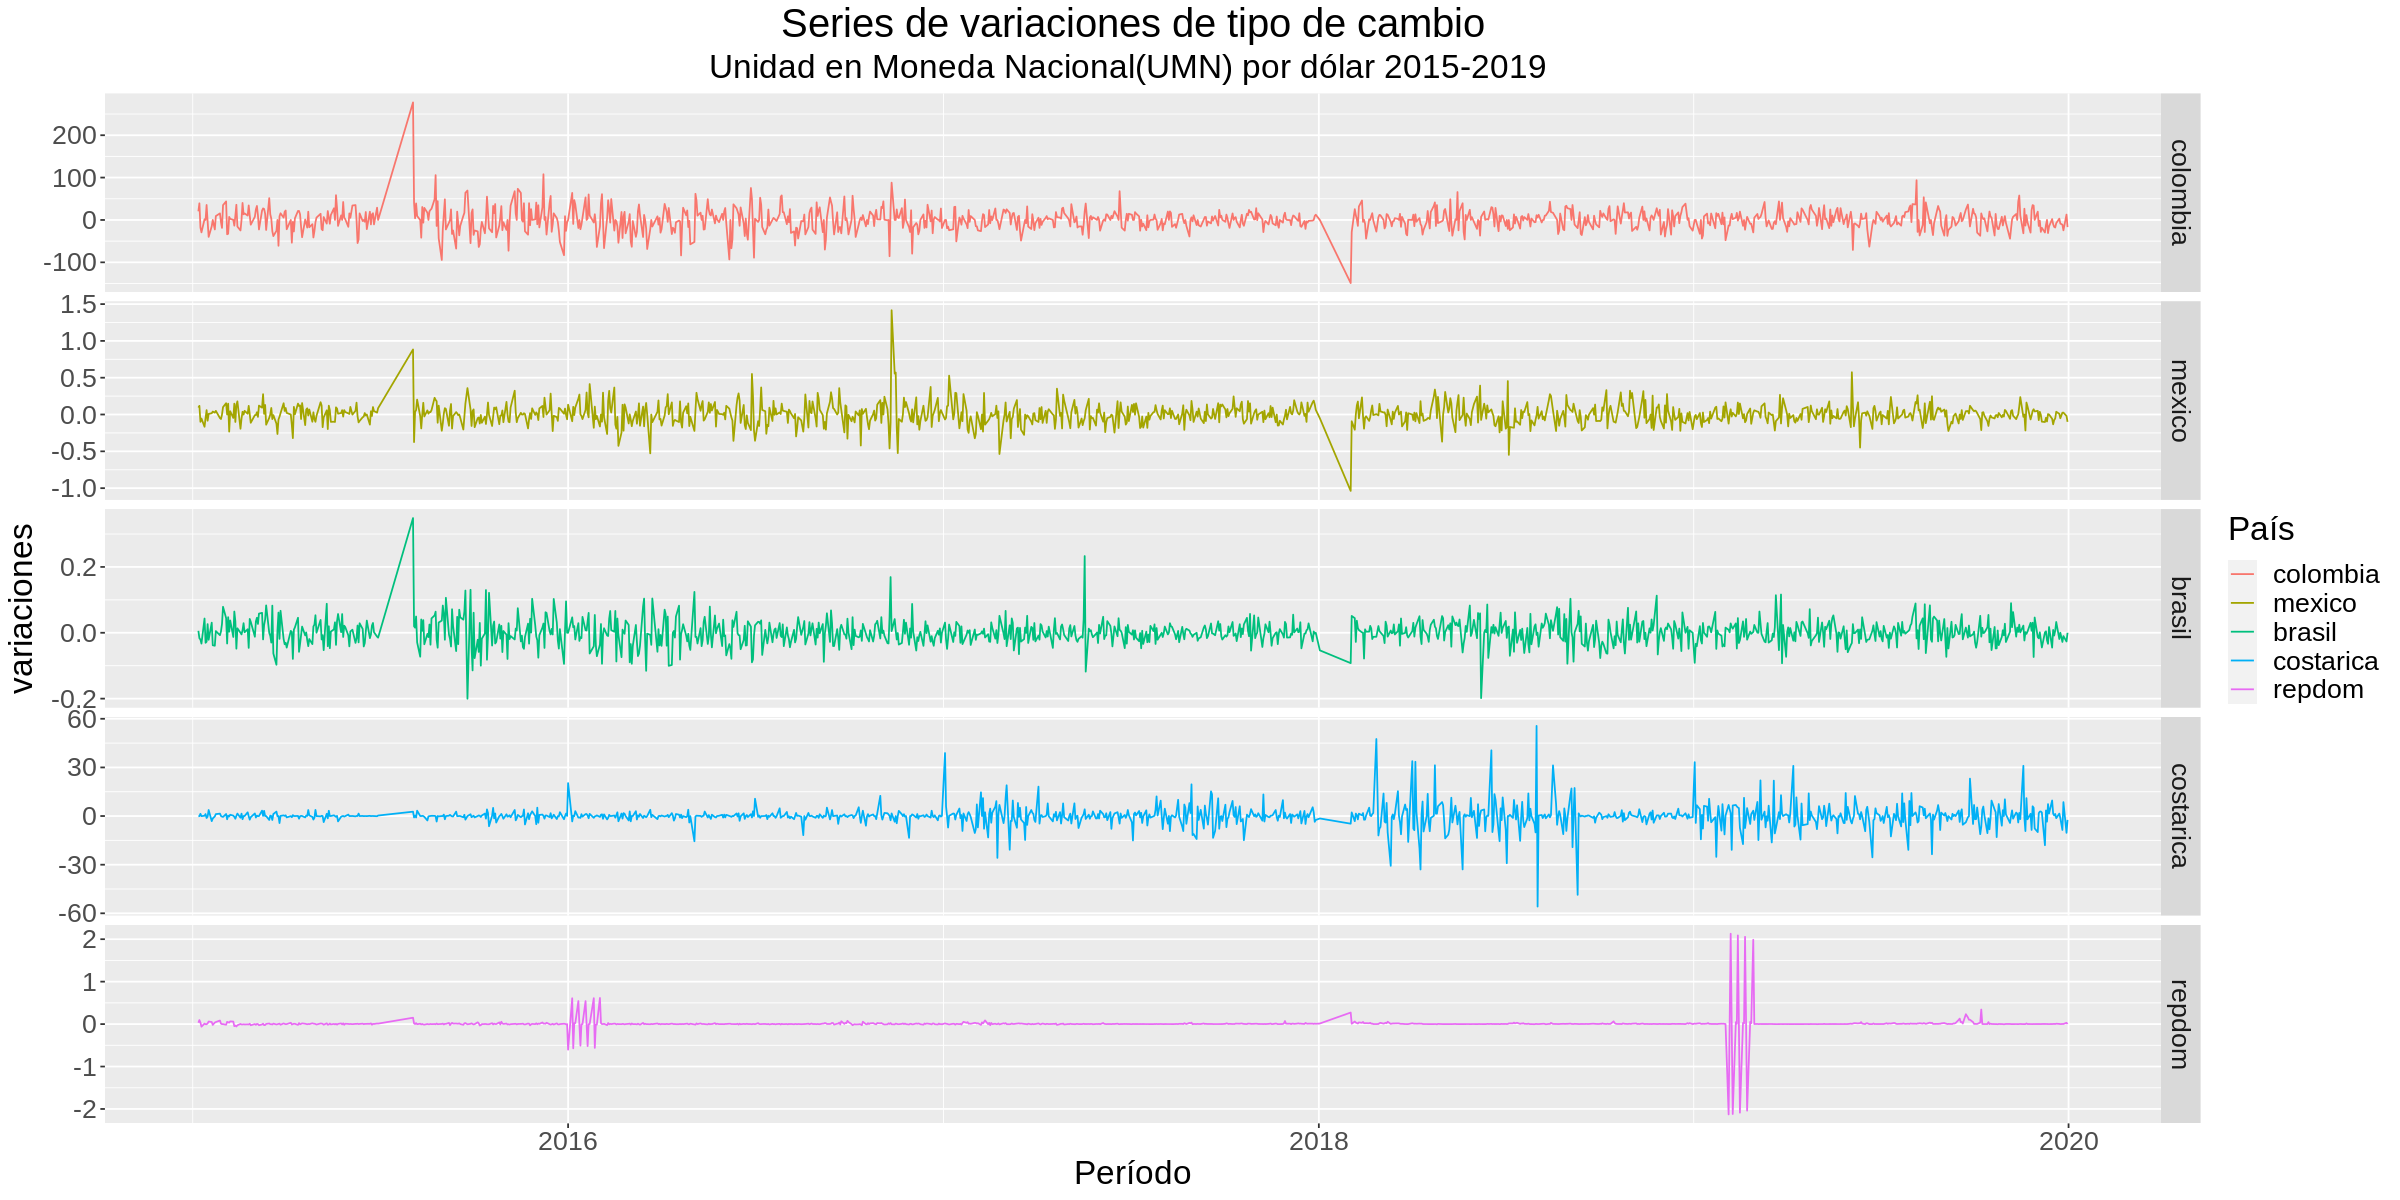

In [92]:
#### 1.3 Explique las posibles deficiencias, en caso de existir, en las definiciones de riesgos presentadas en el punto 2.
# La definicion de riesgo abarca un concepto relacionado a las pérdidas mientras que la volatilidad puede ser tanto una ventaja como una desventaja

In [ ]:
#### 1.4 Obtenga la volatilidad de las series en logaritmo y su primera diferencia (retornos).
df1 <- df1 %>% mutate(vol=(log(value) - lag(log(value),1))^2, dlrt = log(value) - lag(log(value),1))
df1 <- df1 %>%  group_by(variable) %>% dplyr::mutate(rt=(value-lag(value, 1)))
df1 %>% drop_na(rt) %>% ggplot(aes(x = date, y = vol, color = variable)) +
          geom_line() +
          labs(title="Series de tipo de cambio", subtitle="Series de Volatilidad 2015-2019 ", x = "Período", y = "Volatilidad", color = "País") +
          theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5)) +
          facet_grid(variable ~ ., scales="free_y") 

df1 %>% drop_na(rt) %>% ggplot(aes(x = date, y = dlrt, color = variable)) +
          geom_line() +
          labs(title="Series de tipo de cambio", subtitle="Series de Volatilidad 2015-2019 ", x = "Período", y = "Volatilidad", color = "País") +
          theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5)) +
          facet_grid(variable ~ ., scales="free_y") 


In [ ]:
##### 1.5 De cada serie de rendimiento, excluya el 5% de sus valores extremos y obtenga nuevamente sus niveles de volatilidad
z_scores <- as.data.frame(sapply(df, function(df) (abs(df-mean(df))/sd(df))))
head(z_scores)

col = df[z_scores$colombia < 2.5, c(1,2)]
mex = df[z_scores$mexico < 2.5, c(1,3)]
bra = df[z_scores$brasil < 2.5, c(1,4)]
cr = df[z_scores$costarica < 2.5, c(1,5)]
rd = df[z_scores$repdom < 2.5, c(1,6)]
 
p1 <- col %>% mutate(vol=(log(col$colombia) - lag(log(col$colombia),1))^2) %>% ggplot(aes(x=date, y=vol)) + geom_line() + labs(title="Colombia")
p2 <- mex %>% mutate(vol=(log(mex$mexico) - lag(log(mex$mexico),1))^2) %>% ggplot(aes(x=date, y=vol)) + geom_line() + labs(title="Mexico")
p3<- bra %>% mutate(vol=(log(bra$brasil) - lag(log(bra$brasil),1))^2) %>% ggplot(aes(x=date, y=vol)) + geom_line() + labs(title="Brasil")
p4 <- cr %>% mutate(vol=(log(cr$costarica) - lag(log(cr$costarica),1))^2) %>% ggplot(aes(x=date, y=vol)) + geom_line() + labs(title="CR")
p5 <- rd %>% mutate(vol=(log(rd$repdom) - lag(log(rd$repdom),1))^2) %>% ggplot(aes(x=date, y=vol)) + geom_line() + labs(title="RD")

plot_grid(p1,p2,p3,p4,p5)

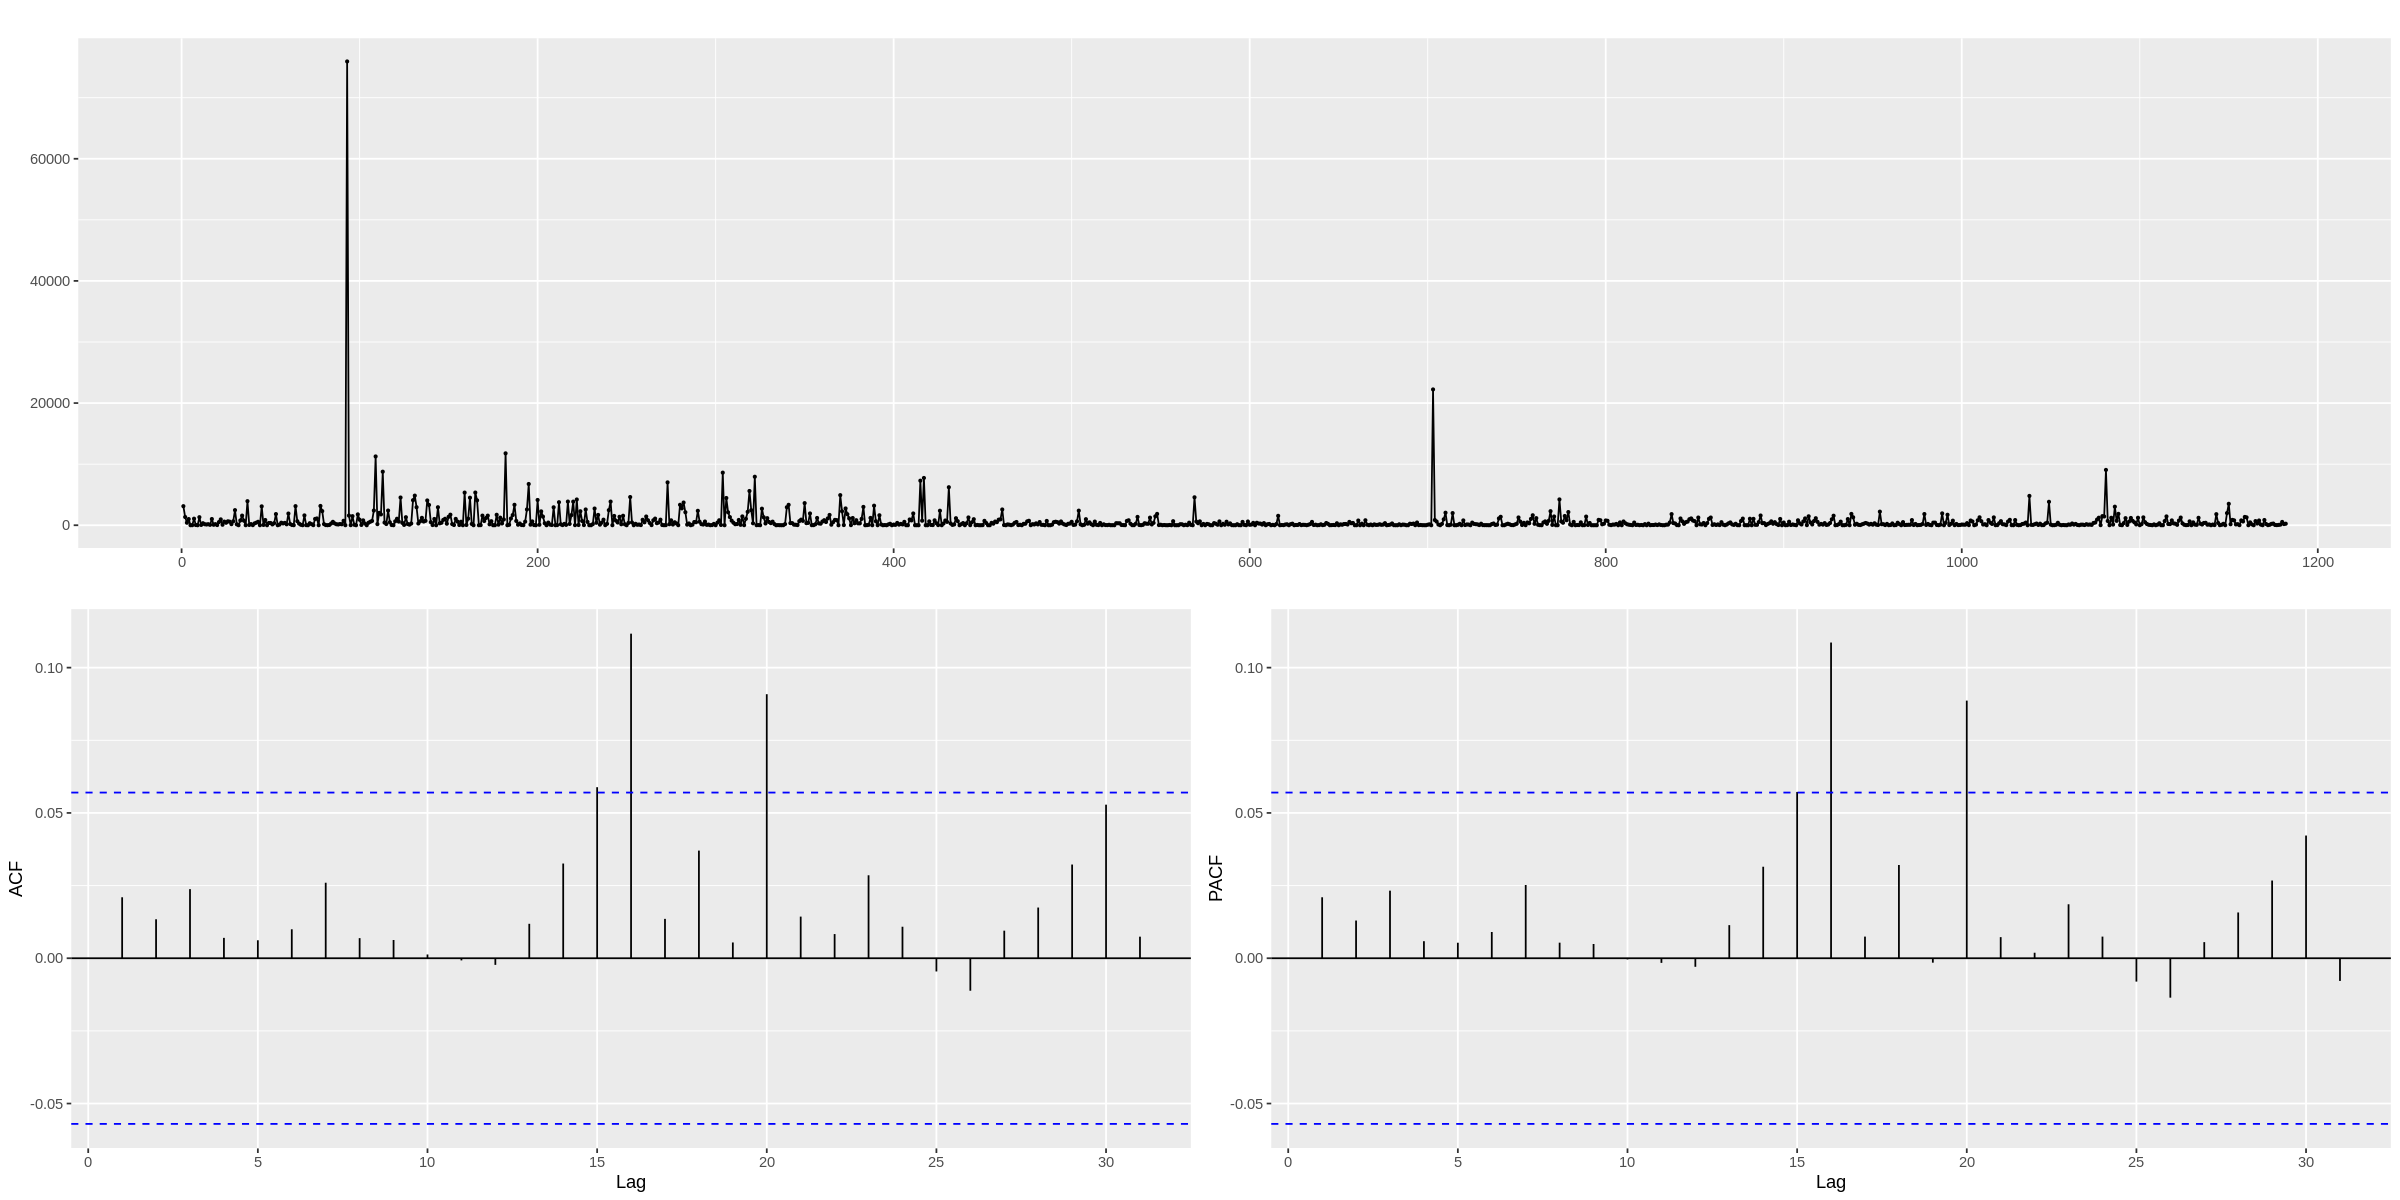

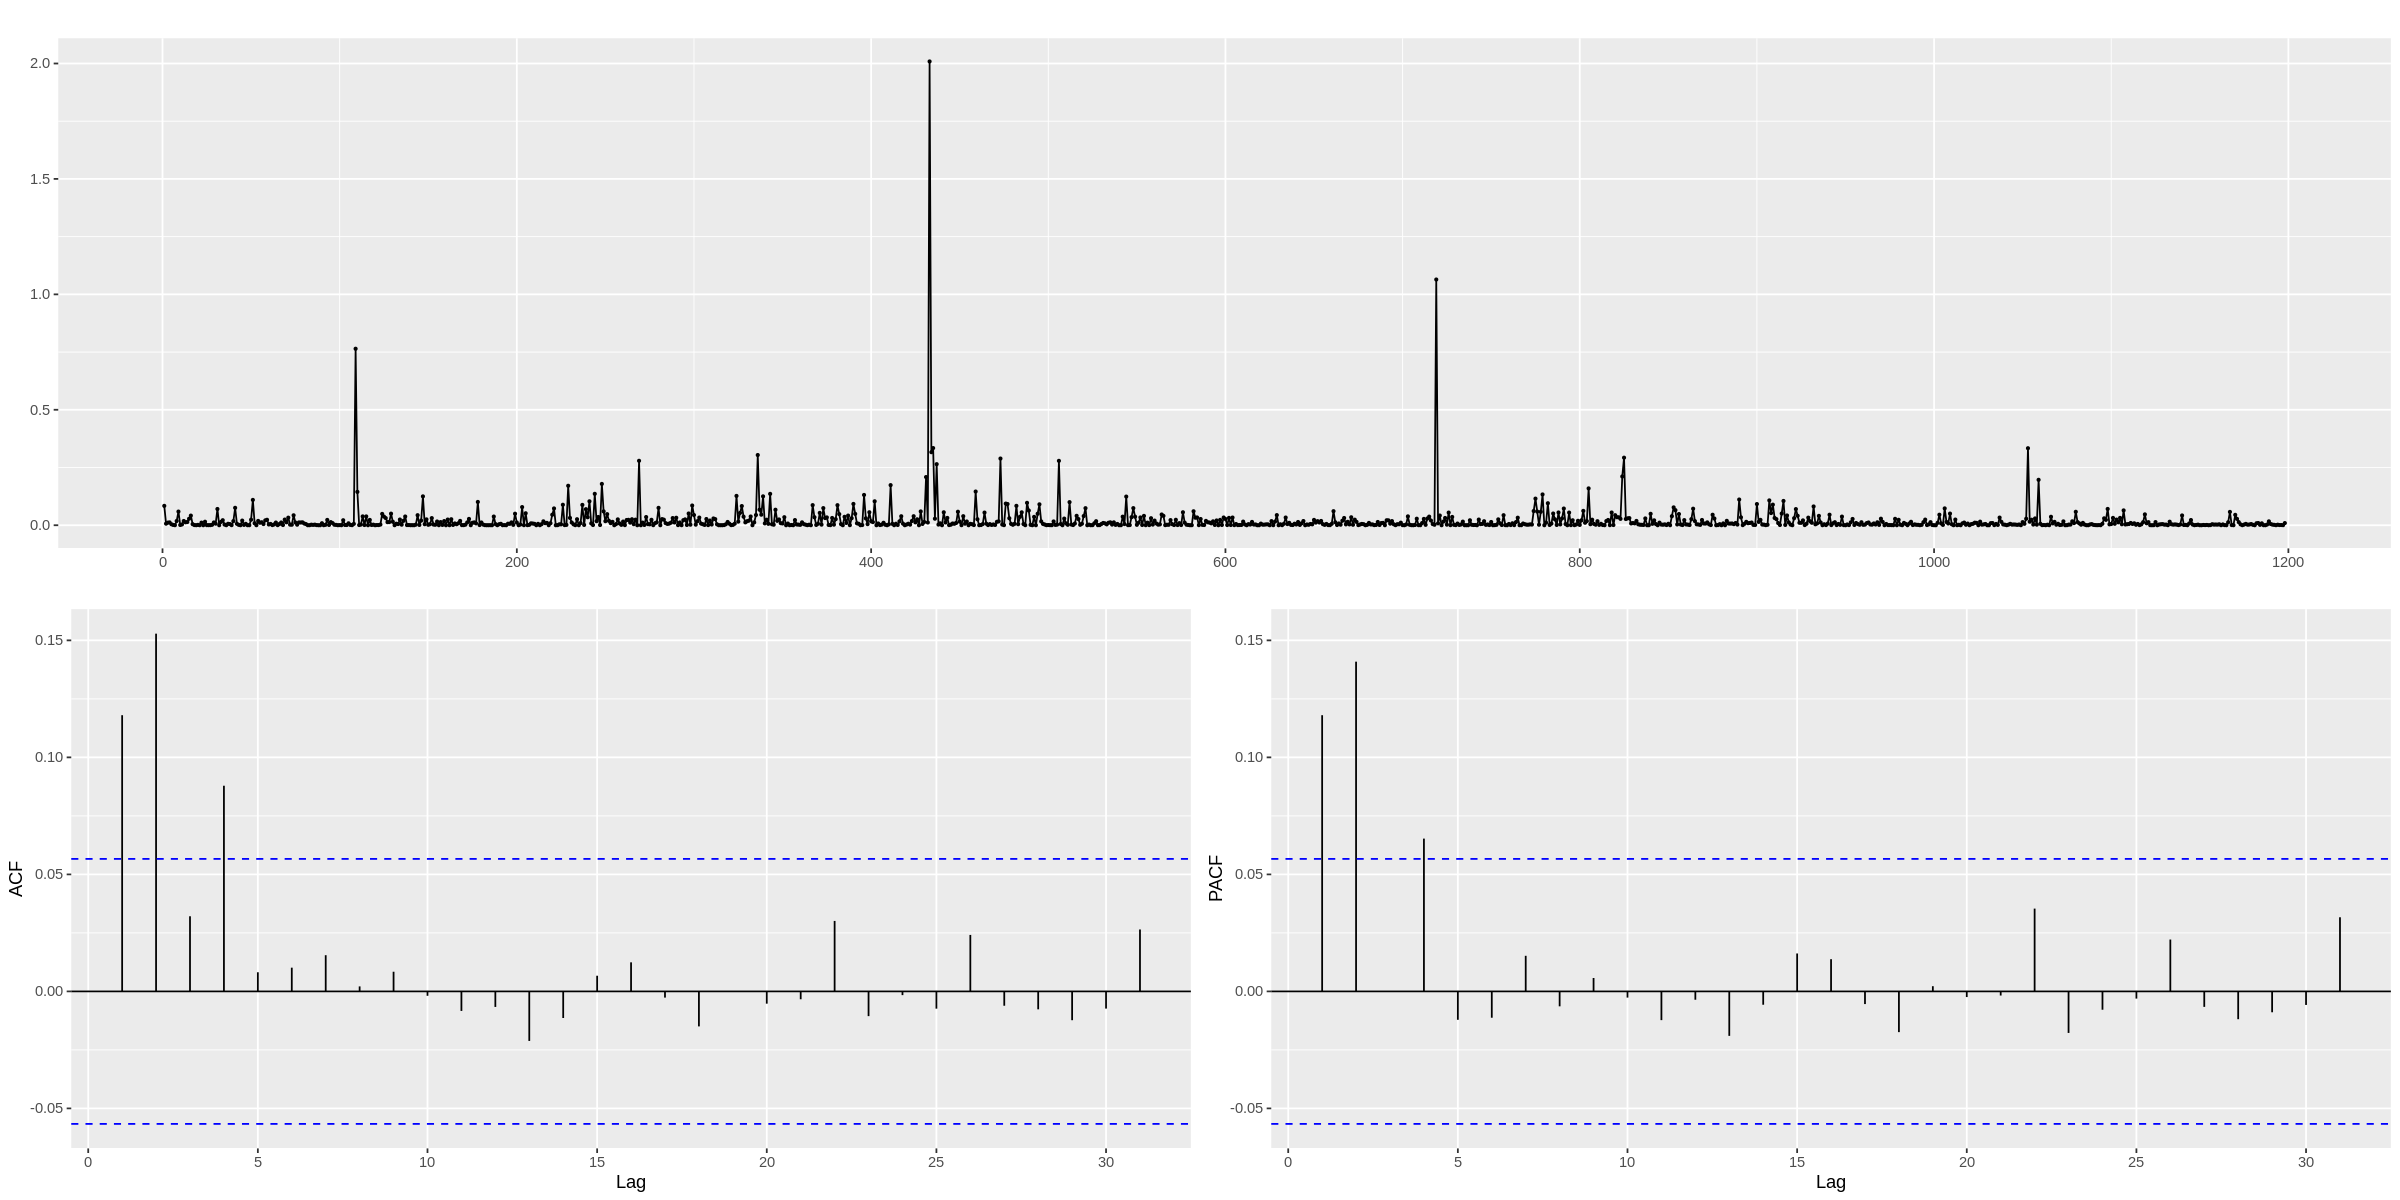

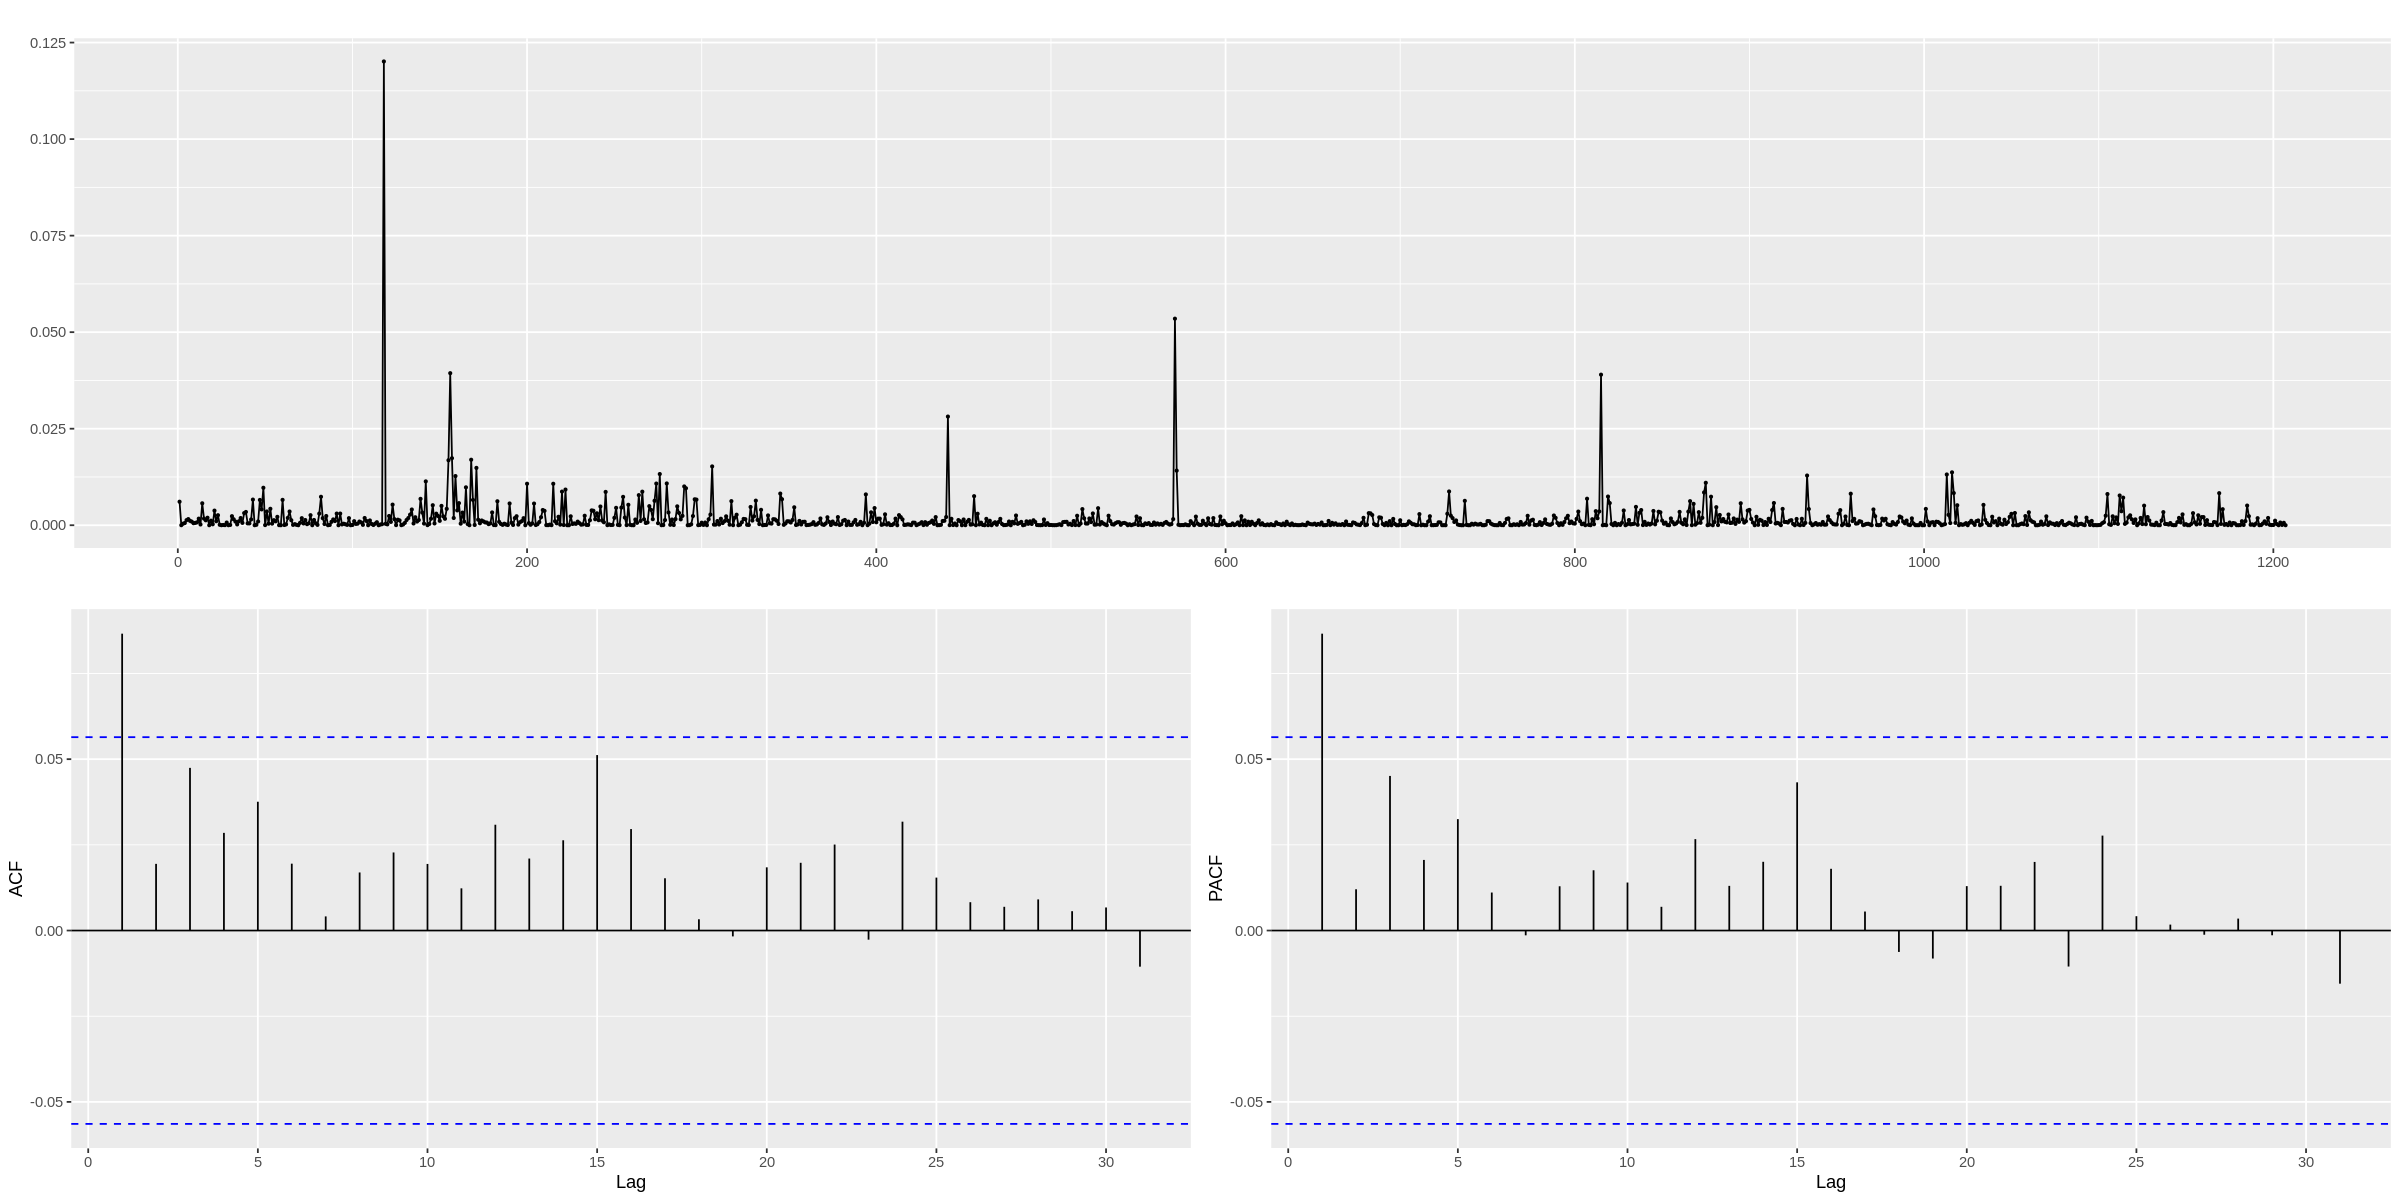

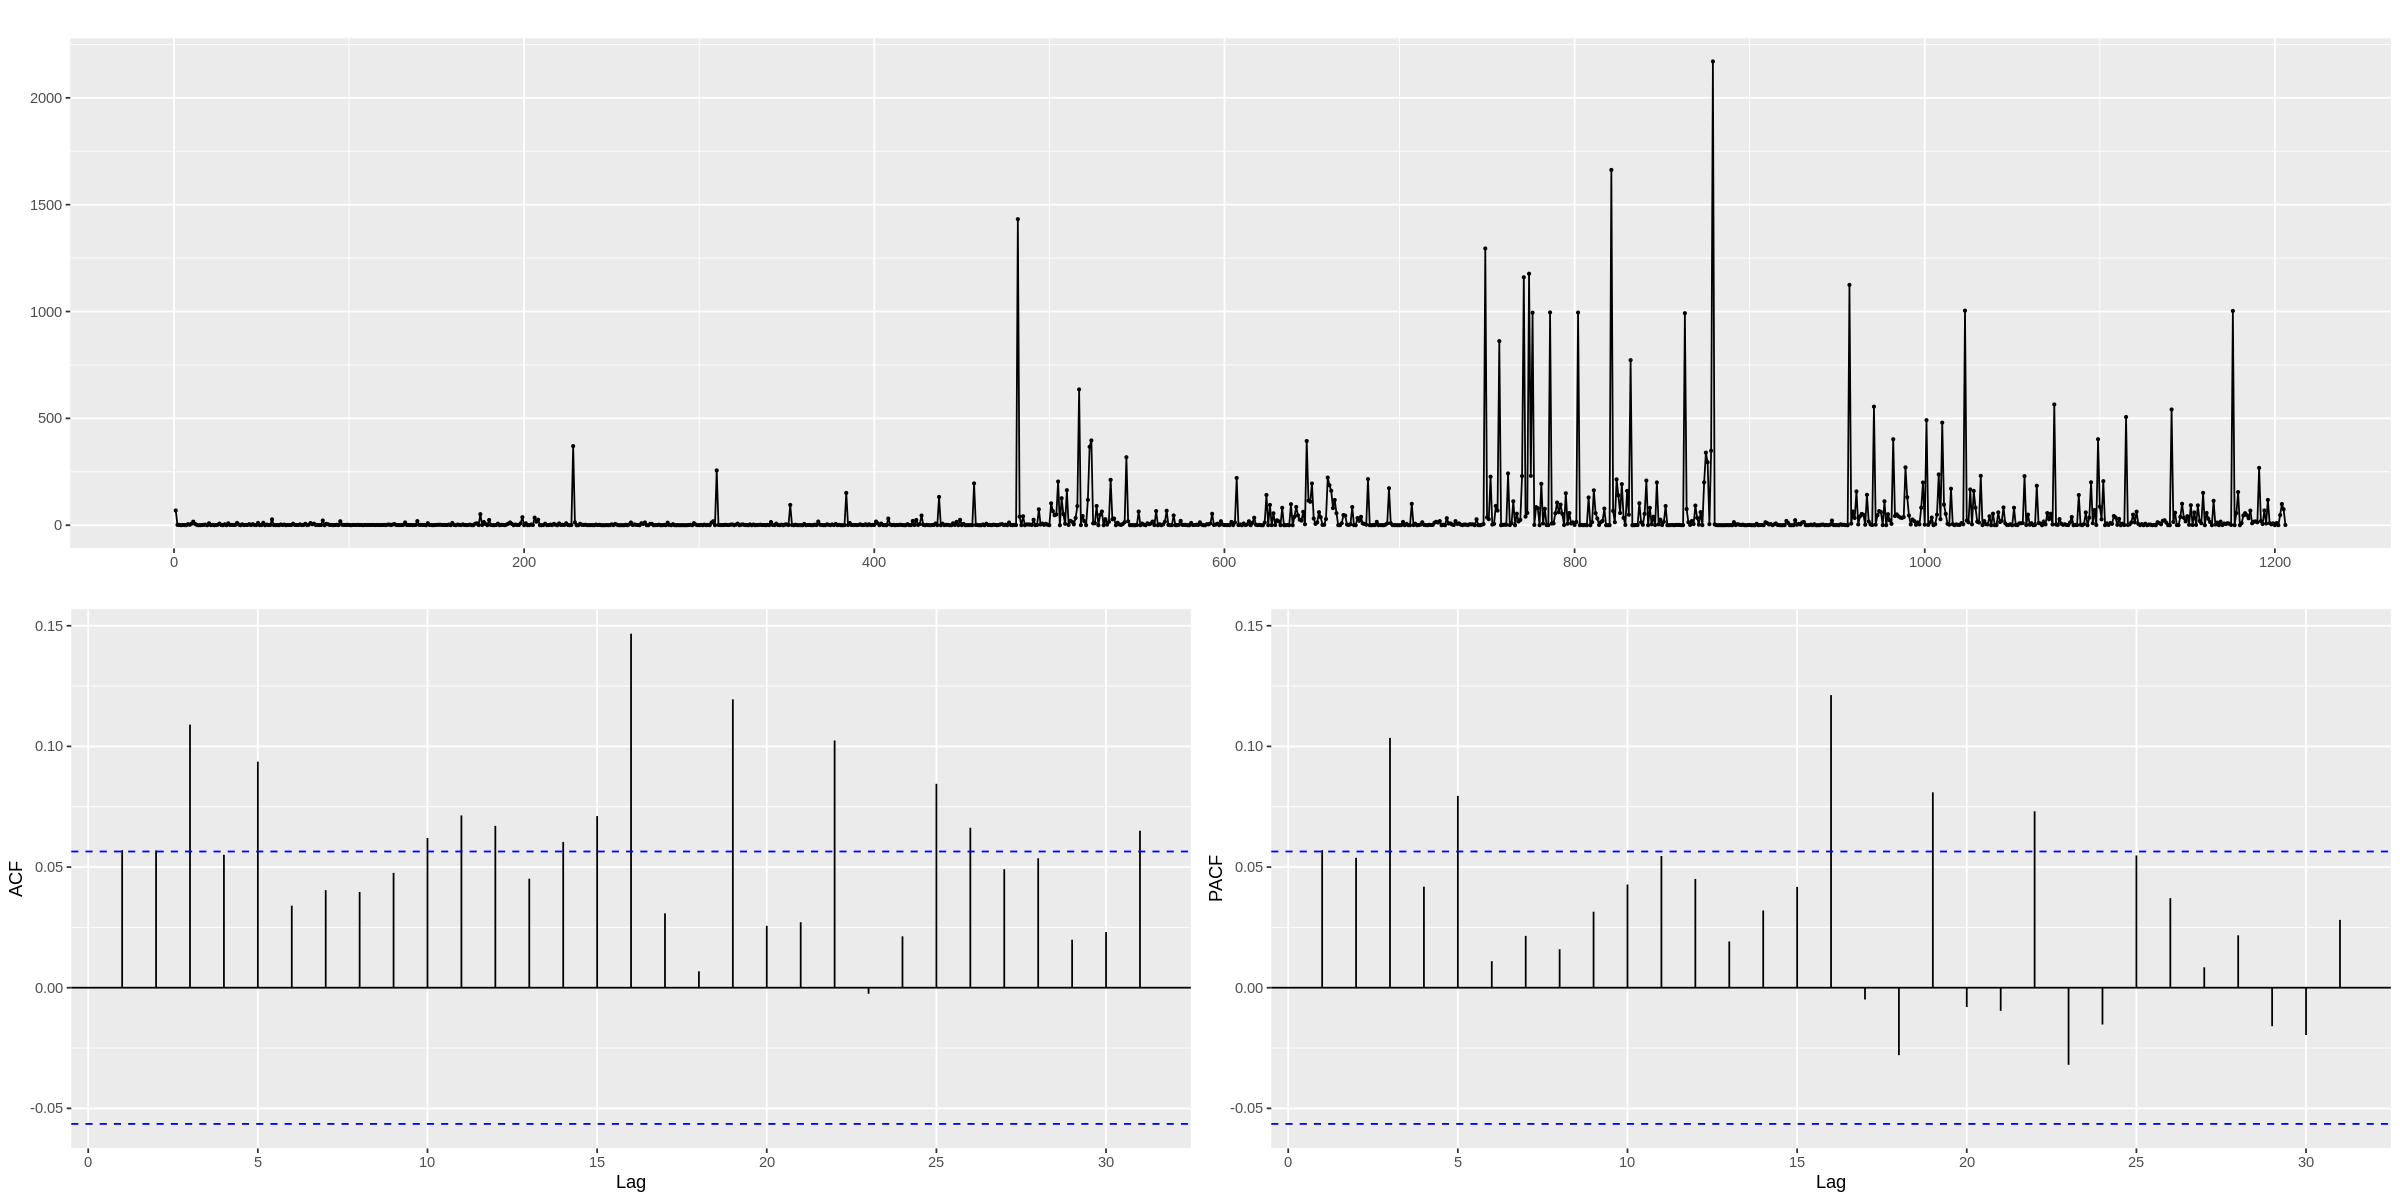

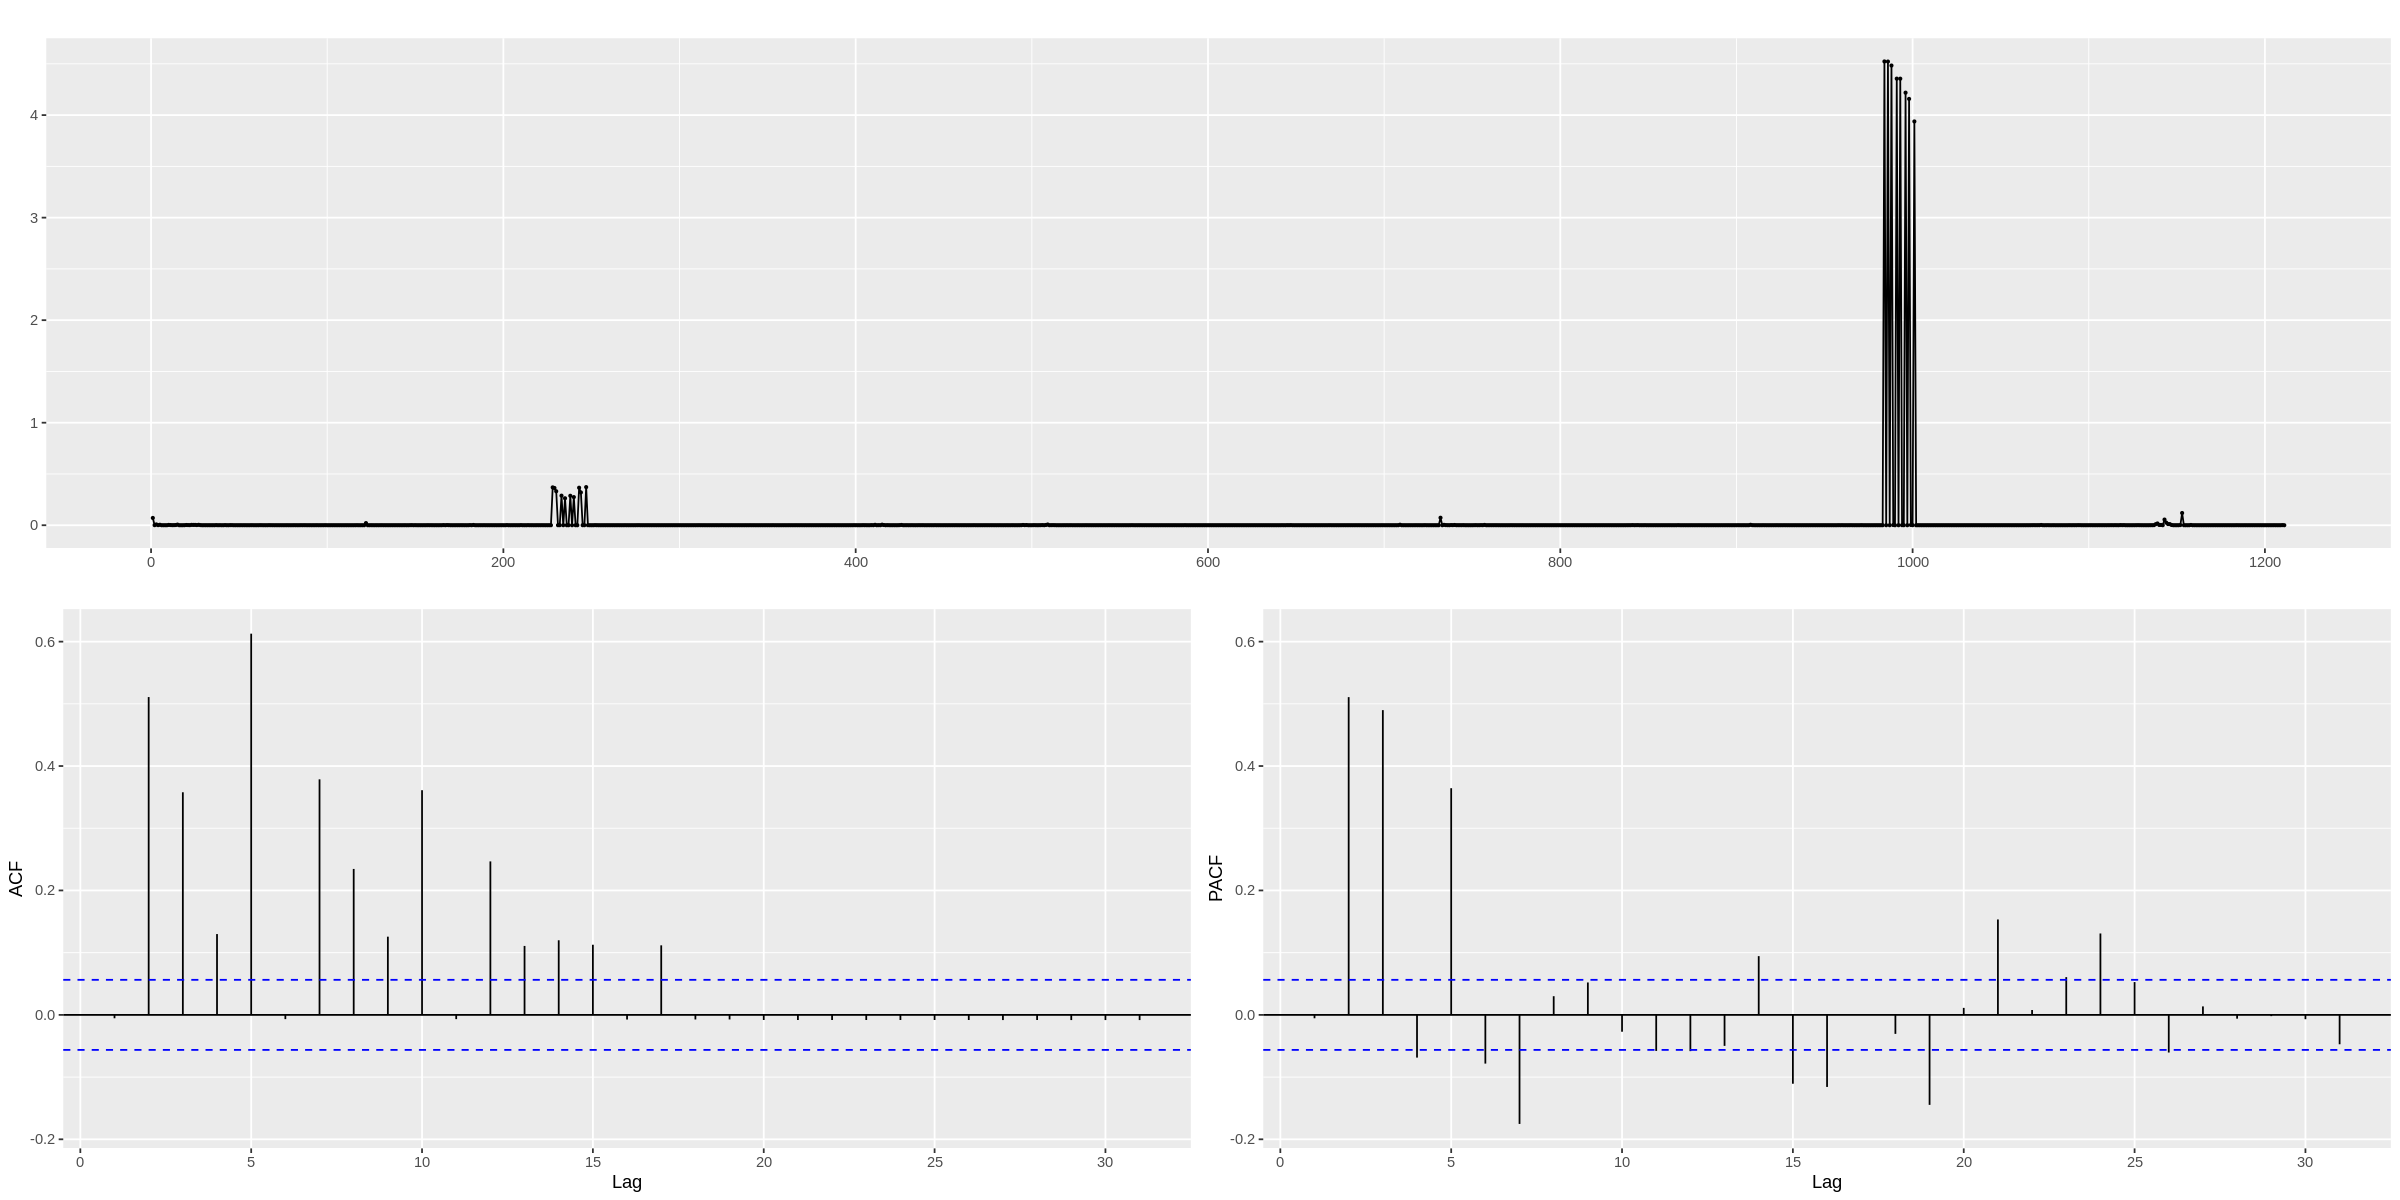

In [149]:
#### 1.6.Proponga un AR(1) para cada serie y recupere su nivel de volatilidad.
arima_col <-(arima(col$colombia,order = c(1,0,0))$residuals)^2
arima_mex <-(arima(mex$mexico,order = c(1,0,0))$residuals)^2
arima_bra <-(arima(bra$brasil,order = c(1,0,0))$residuals)^2
arima_cr <-(arima(cr$costarica,order = c(1,0,0))$residuals)^2
arima_rd <-(arima(rd$repdom,order = c(1,0,0))$residuals)^2

ggtsdisplay(arima_col, main="")
ggtsdisplay(arima_mex, main="")
ggtsdisplay(arima_bra, main="")
ggtsdisplay(arima_cr, main="")
ggtsdisplay(arima_rd, main="")

In [ ]:
#### 1.7.Valide el modelo ARIMA propuesto para modelar la persistencia en media.
# El model ARIMA no resulta suficiente para poder modelar la persistencia en media debido a que posee autocorrelacion en los residuos

In [ ]:
#### 1.8.Cree una tabla con la volatilidad anualizada obtenida para los retornos en 1.4, 1.5, 1.6 .En base a los resultados obtenidos, puede realizar análisis adicionales en caso de entenderlos necesarios, indíquele a su jefe cual es la divisa que presenta menor riesgo en el contexto histórico elegido.
# La divisa que presenta mayores riesgos en el contexto histórico es el colon de costa rica, debido a que en los últimos años presentó saltos en su volatilidad lo cual nos permite distinguir varios clusters de volatilidad
# La divisa recomendada seria el peso dominicano porque es la que cuenta con menores clusteres de volatilidad y es la mas estable en el periodo analizado


In [ ]:
#### 1.9.Explique como posibles cambios estructurales pueden incidir en la decisión que acaba de recomendar.
# Cambios en las economías de la región pudieran afectar la decisión en el sentido de que si por ejemplo RD cambia su politica cambiaria y dejase que su moneda fluctuase libremente
# entonces el peso dominicano no contara con dicha estabilidad

In [ ]:
data_wti <- datos %>% filter(series_id == "DCOILWTICO") %>% select(date,value)
data_sp <- datos %>% filter(series_id == "SP500") %>% select(date,value)
data_vix <- datos %>% filter(series_id == "VIXCLS") %>% select(date,value)

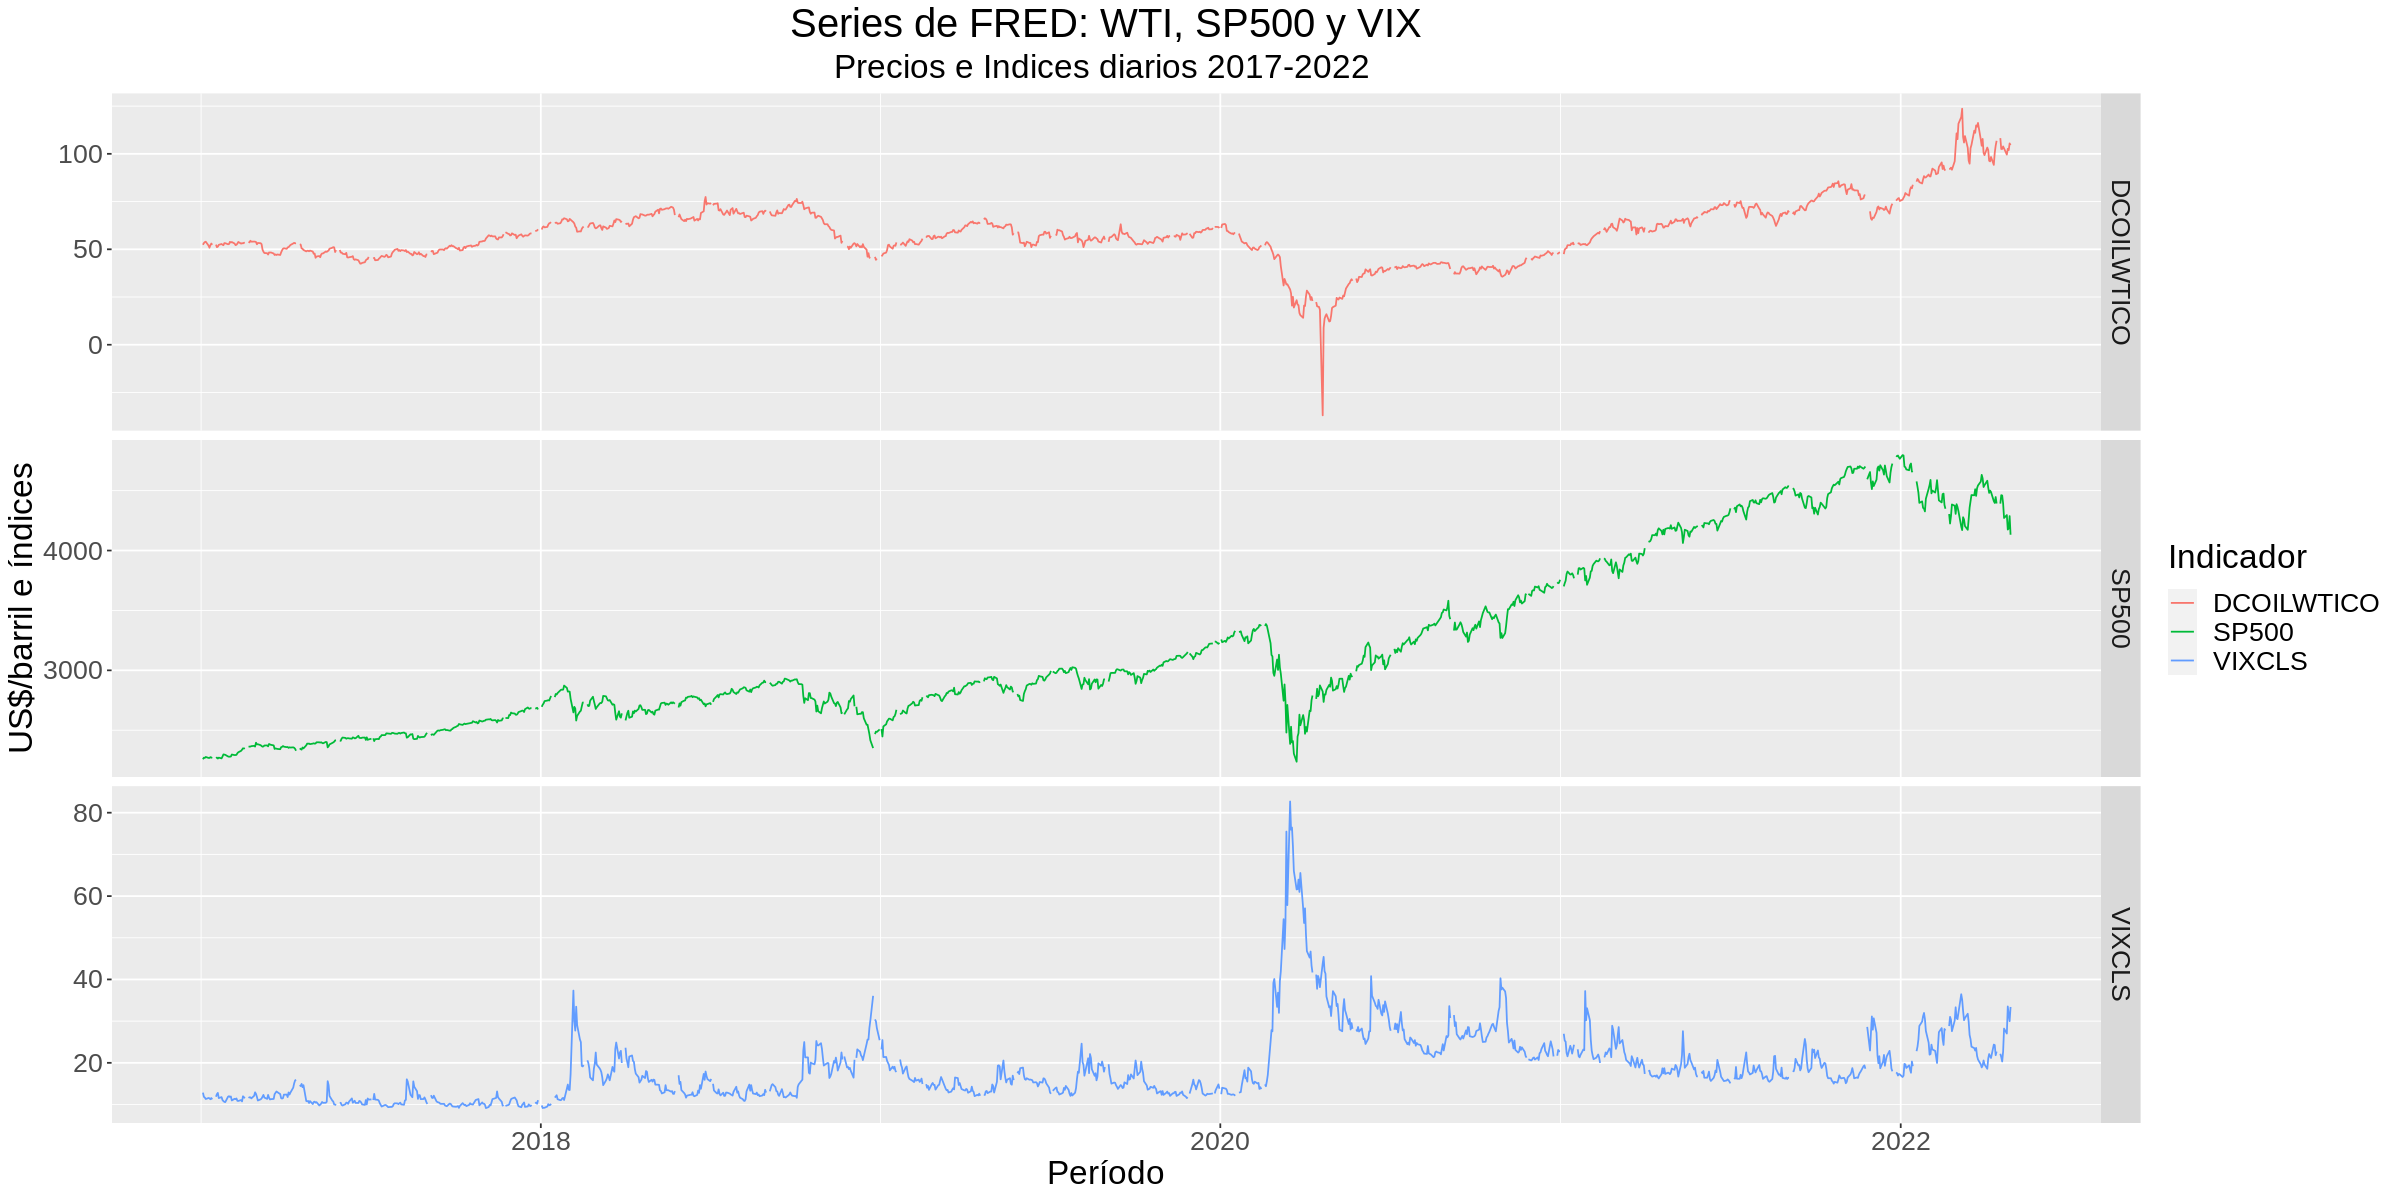

In [ ]:
datos %>% ggplot(aes(x = date, y = value, color = series_id)) +
          geom_line() +
          labs(title="Series de FRED: WTI, SP500 y VIX", subtitle="Precios e Indices diarios 2017-2022 ", x = "Período", y = "US$/barril e índices", color = "Indicador") +
          theme(text = element_text(size = 20), plot.title = element_text(hjust = 0.5), plot.subtitle = element_text(hjust = 0.5)) +
          facet_grid(series_id ~ ., scales="free_y") 




Vemos que el precio del petróleo presentó un comportamiento relativamente estable oscilando los 50US$ por barril desde el 2017 hasta el período de la pandemia, donde después de una caída sustancial producto de la crisis, adquiere una tendencia alcista hasta el presente.

El SP500 muestra un comportamiento alcista desde 2017, manteniéndose incluso después del período pandémico en 2020-2021.

Respecto al índice de volatilidad, esta muestra la expectativa a corto plazo de la volatilidad del mercado de valores estadounidense. Muestra un índice que oscila alrededor de 20, para luego alcanzar un máximo por encima de 80 en pandemia. En períodos post-pandémicos regresa a su comportamiento habitual. 